In [15]:
%pip install pyyaml h5py
%pip install softposit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for softposit: filename=softposit-0.3.4.4-cp310-cp310-linux_x86_64.whl size=374166 sha256=57eaddb8499b02bca010c6c082247ed700b3a48d7ff2051f2fb2e48d36b3b2d1
  Stored in directory: /root/.cache/pip/wheels/99/f1/20/d5f8be9cc554fe2ec37ec65ddc64002b5bee71f44899e3e33c
Successfully built softposit


In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
import matplotlib.pyplot as plt
import copy
import softposit as sp
import numpy as np

In [35]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images[:1000]
train_labels = train_labels[:1000]

train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_labels

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [39]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [40]:
history = model.fit(train_images,
          train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
32/32 [==============================] - 7s 182ms/step - loss: 1.6782 - accuracy: 0.4880 - val_loss: 0.8957 - val_accuracy: 0.6834
Epoch 2/5
32/32 [==============================] - 4s 116ms/step - loss: 0.6271 - accuracy: 0.8190 - val_loss: 0.4844 - val_accuracy: 0.8437
Epoch 3/5
32/32 [==============================] - 4s 114ms/step - loss: 0.3718 - accuracy: 0.8950 - val_loss: 0.3640 - val_accuracy: 0.8825
Epoch 4/5
32/32 [==============================] - 6s 194ms/step - loss: 0.2690 - accuracy: 0.9280 - val_loss: 0.3185 - val_accuracy: 0.8969
Epoch 5/5
32/32 [==============================] - 4s 118ms/step - loss: 0.2171 - accuracy: 0.9400 - val_loss: 0.2364 - val_accuracy: 0.9241


In [11]:
# os.listdir(checkpoint_dir)
model.save('my_model.keras')

In [ ]:
# new_model = tf.keras.models.load_model('my_model.keras')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

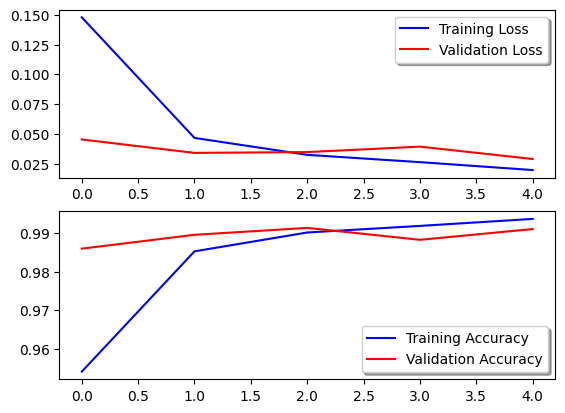

In [20]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'],
           color='b',
           label="Training Loss")

ax[0].plot(history.history['val_loss'],
           color='r',
           label="Validation Loss",
           axes =ax[0])

legend = ax[0].legend(loc='best',
                      shadow=True)

ax[1].plot(history.history['accuracy'],
           color='b',
           label="Training Accuracy")

ax[1].plot(history.history['val_accuracy'],
           color='r',
           label="Validation Accuracy")

legend = ax[1].legend(loc='best',
                      shadow=True)

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 0.0288 - accuracy: 0.9911


In [32]:
quant_model_16 = copy.deepcopy(model)
quant_model_15 = copy.deepcopy(model)
quant_model_14 = copy.deepcopy(model)
quant_model_13 = copy.deepcopy(model)
quant_model_12 = copy.deepcopy(model)
quant_model_11 = copy.deepcopy(model)
quant_model_10 = copy.deepcopy(model)
quant_model_9 = copy.deepcopy(model)
quant_model_8 = copy.deepcopy(model)
quant_model_7 = copy.deepcopy(model)
quant_model_6 = copy.deepcopy(model)
quant_model_5 = copy.deepcopy(model)
quant_model_4 = copy.deepcopy(model)
quant_model_3 = copy.deepcopy(model)
quant_model_2 = copy.deepcopy(model)

In [56]:
## Recursive function that goes through weight tensor and converts the values from fp to posit and back to quantize the weights
def quant_func(model_weights, type_con):
  if len(model_weights.shape) == 1:
    if type_con == '<16, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 16)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<15, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 15)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<14, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 14)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<13, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 13)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<12, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 12)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<11, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 11)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<10, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 10)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<9, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 9)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<8, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 8)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<7, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 7)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<6, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 6)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<5, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 5)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<4, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 4)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<3, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 3)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<2, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 2)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    return
  else:
    for i in range(model_weights.shape[0]):
      quant_func(model_weights[i], type_con)

Test 16 bit 2 exponent bit quantization

In [57]:
for i in range(len(quant_model_16.weights)):
  weights = quant_model_16.weights[i].numpy()
  type_con = '<16, 2>'
  quant_func(weights, type_con)
  quant_model_16.weights[i].assign(weights)

for i in range(len(quant_model_15.weights)):
  weights = quant_model_15.weights[i].numpy()
  type_con = '<15, 2>'
  quant_func(weights, type_con)
  quant_model_15.weights[i].assign(weights)

for i in range(len(quant_model_14.weights)):
  weights = quant_model_14.weights[i].numpy()
  type_con = '<14, 2>'
  quant_func(weights, type_con)
  quant_model_14.weights[i].assign(weights)

for i in range(len(quant_model_13.weights)):
  weights = quant_model_13.weights[i].numpy()
  type_con = '<13, 2>'
  quant_func(weights, type_con)
  quant_model_13.weights[i].assign(weights)

for i in range(len(quant_model_12.weights)):
  weights = quant_model_12.weights[i].numpy()
  type_con = '<12, 2>'
  quant_func(weights, type_con)
  quant_model_12.weights[i].assign(weights)

In [58]:
for i in range(len(quant_model_11.weights)):
  weights = quant_model_11.weights[i].numpy()
  type_con = '<11, 2>'
  quant_func(weights, type_con)
  quant_model_11.weights[i].assign(weights)

for i in range(len(quant_model_10.weights)):
  weights = quant_model_10.weights[i].numpy()
  type_con = '<10, 2>'
  quant_func(weights, type_con)
  quant_model_10.weights[i].assign(weights)

for i in range(len(quant_model_9.weights)):
  weights = quant_model_9.weights[i].numpy()
  type_con = '<9, 2>'
  quant_func(weights, type_con)
  quant_model_9.weights[i].assign(weights)

for i in range(len(quant_model_8.weights)):
  weights = quant_model_13.weights[i].numpy()
  type_con = '<8, 2>'
  quant_func(weights, type_con)
  quant_model_8.weights[i].assign(weights)

for i in range(len(quant_model_7.weights)):
  weights = quant_model_7.weights[i].numpy()
  type_con = '<7, 2>'
  quant_func(weights, type_con)
  quant_model_7.weights[i].assign(weights)

In [59]:
for i in range(len(quant_model_6.weights)):
  weights = quant_model_6.weights[i].numpy()
  type_con = '<6, 2>'
  quant_func(weights, type_con)
  quant_model_6.weights[i].assign(weights)

for i in range(len(quant_model_5.weights)):
  weights = quant_model_5.weights[i].numpy()
  type_con = '<5, 2>'
  quant_func(weights, type_con)
  quant_model_5.weights[i].assign(weights)

for i in range(len(quant_model_4.weights)):
  weights = quant_model_4.weights[i].numpy()
  type_con = '<4, 2>'
  quant_func(weights, type_con)
  quant_model_4.weights[i].assign(weights)

for i in range(len(quant_model_3.weights)):
  weights = quant_model_3.weights[i].numpy()
  type_con = '<3, 2>'
  quant_func(weights, type_con)
  quant_model_3.weights[i].assign(weights)

for i in range(len(quant_model_2.weights)):
  weights = quant_model_2.weights[i].numpy()
  type_con = '<2, 2>'
  quant_func(weights, type_con)
  quant_model_2.weights[i].assign(weights)

In [62]:
quant_16_test_loss, quant_16_test_acc = quant_model_16.evaluate(test_images, test_labels)
quant_15_test_loss, quant_15_test_acc = quant_model_15.evaluate(test_images, test_labels)
quant_14_test_loss, quant_14_test_acc = quant_model_14.evaluate(test_images, test_labels)
quant_13_test_loss, quant_13_test_acc = quant_model_13.evaluate(test_images, test_labels)
quant_12_test_loss, quant_12_test_acc = quant_model_12.evaluate(test_images, test_labels)
quant_11_test_loss, quant_11_test_acc = quant_model_11.evaluate(test_images, test_labels)
quant_10_test_loss, quant_10_test_acc = quant_model_10.evaluate(test_images, test_labels)
quant_9_test_loss, quant_9_test_acc = quant_model_9.evaluate(test_images, test_labels)
quant_8_test_loss, quant_8_test_acc = quant_model_8.evaluate(test_images, test_labels)
quant_7_test_loss, quant_7_test_acc = quant_model_7.evaluate(test_images, test_labels)
quant_6_test_loss, quant_6_test_acc = quant_model_6.evaluate(test_images, test_labels)
quant_5_test_loss, quant_5_test_acc = quant_model_5.evaluate(test_images, test_labels)
quant_4_test_loss, quant_4_test_acc = quant_model_4.evaluate(test_images, test_labels)
quant_3_test_loss, quant_3_test_acc = quant_model_3.evaluate(test_images, test_labels)
quant_2_test_loss, quant_2_test_acc = quant_model_2.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 2535.2837 - accuracy: 0.9315


In [60]:
print(model.weights)

[<tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.09759559,  0.16188821,  0.06218926, -0.07861704,
           0.12787333, -0.1274901 ,  0.1325616 ,  0.12015248,
          -0.05820933,  0.16016865, -0.00291814, -0.10203332,
          -0.05069458, -0.0591299 , -0.09185576,  0.19559908,
           0.14466871,  0.17195174,  0.09836026, -0.0545347 ,
           0.11527934, -0.00750636,  0.09282612,  0.11116763,
           0.09881817,  0.13702215,  0.05051411,  0.01474945,
           0.1448166 , -0.09409782, -0.05555469,  0.08817071]],

        [[-0.03011892,  0.1687388 , -0.01752986,  0.11341529,
           0.05552481, -0.02970418,  0.10050929,  0.11777885,
           0.17171851, -0.02649174, -0.07103363,  0.05810659,
           0.08172205, -0.15514135, -0.1344652 ,  0.08239475,
           0.01950047,  0.08568045, -0.06913095, -0.09223906,
           0.16615048, -0.07327864,  0.2007166 , -0.0077043 ,
           0.02934559, -0.04938433, -0.05423941,  0.0

In [63]:
print(quant_model_2.weights)

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,
           1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
          -1.,  1., -1., -1.,  1.,  1.,  1.,  1.]],

        [[-1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
           1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
           1.,  1., -1., -1., -1., -1., -1.,  1.]],

        [[ 1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
           1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
           1., -1.,  1., -1., -1., -1., -1., -1.]]],


       [[[-1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,
           1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,
           1.,  1., -1., -1., -1.,  1.,  1., -1.]],

        [[ 1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
           1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,
           1

In [129]:
quant_model_15_16 = copy.deepcopy(quant_model_16)
# quant_model_14_16 = copy.deepcopy(model)
# quant_model_13_16 = copy.deepcopy(model)
# quant_model_12_16 = copy.deepcopy(model)
# quant_model_11_16 = copy.deepcopy(model)
# quant_model_10_16 = copy.deepcopy(model)
# quant_model_9_16 = copy.deepcopy(model)
# quant_model_8_16 = copy.deepcopy(model)
# quant_model_7_16 = copy.deepcopy(model)
# quant_model_6_16 = copy.deepcopy(model)
# quant_model_5_16 = copy.deepcopy(model)
# quant_model_4_16 = copy.deepcopy(model)
# quant_model_3_16 = copy.deepcopy(model)
# quant_model_2_16 = copy.deepcopy(model)

Convert to 16 bit posits and then truncate last bit

In [128]:
def quant_trunc(model_weights, type_con):
  if len(model_weights.shape) == 1:
    if type_con == '<15, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 16)
        tmp_pos = tmp_pos.toPosit_2(15)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<14, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 15)
        tmp_pos = tmp_pos.toPosit_2(14)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<13, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 14)
        tmp_pos = tmp_pos.toPosit_2(13)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<12, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 13)
        tmp_pos = tmp_pos.toPosit_2(12)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<11, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 12)
        tmp_pos = tmp_pos.toPosit_2(11)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<10, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 11)
        tmp_pos = tmp_pos.toPosit_2(10)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<9, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 10)
        tmp_pos = tmp_pos.toPosit_2(9)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<8, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 9)
        tmp_pos = tmp_pos.toPosit_2(8)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<7, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 8)
        tmp_pos = tmp_pos.toPosit_2(7)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<6, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 7)
        tmp_pos = tmp_pos.toPosit_2(6)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<5, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 6)
        tmp_pos = tmp_pos.toPosit_2(5)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<4, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 5)
        tmp_pos = tmp_pos.toPosit_2(4)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<3, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 4)
        tmp_pos = tmp_pos.toPosit_2(3)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    elif type_con == '<2, 2>':
      for j in range(len(model_weights)):
        tmp_pos = sp.posit_2(float(model_weights[j]), 3)
        tmp_pos = tmp_pos.toPosit_2(2)
        tmp_pos = np.float32(tmp_pos)
        model_weights[j] = tmp_pos
    return
  else:
    for i in range(model_weights.shape[0]):
      quant_trunc(model_weights[i], type_con)

In [130]:
eval_list = []
for j in range(0, 14, 1):
  for i in range(len(quant_model_15_16.weights)):
    weights = quant_model_15_16.weights[i].numpy()
    type_con = f'<{str(i)}, 2>'
    quant_trunc(weights, type_con)
    quant_model_15_16.weights[i].assign(weights)
  eval_list.append(copy.deepcopy(quant_model_15_16))

In [131]:
for i in eval_list:
  i.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 2.1915 - accuracy: 0.8962


In [132]:
eval_list[-1].weights

[<tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.09759559,  0.16188821,  0.06218926, -0.07861704,
            0.12787333, -0.1274901 ,  0.1325616 ,  0.12015248,
           -0.05820933,  0.16016865, -0.00291814, -0.10203332,
           -0.05069458, -0.0591299 , -0.09185576,  0.19559908,
            0.14466871,  0.17195174,  0.09836026, -0.0545347 ,
            0.11527934, -0.00750636,  0.09282612,  0.11116763,
            0.09881817,  0.13702215,  0.05051411,  0.01474945,
            0.1448166 , -0.09409782, -0.05555469,  0.08817071]],
 
         [[-0.03011892,  0.1687388 , -0.01752986,  0.11341529,
            0.05552481, -0.02970418,  0.10050929,  0.11777885,
            0.17171851, -0.02649174, -0.07103363,  0.05810659,
            0.08172205, -0.15514135, -0.1344652 ,  0.08239475,
            0.01950047,  0.08568045, -0.06913095, -0.09223906,
            0.16615048, -0.07327864,  0.2007166 , -0.0077043 ,
            0.02934559, -0.04938433, -